In [1]:
import sklearn as sk
from sklearn import datasets, decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
import glob
import imutils
import open3d as o3d
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import copy
import os

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# YOU GOT THIS!

In [2]:
img1 = cv2.imread('things1.png')
img2 = cv2.imread('things2.png')

b,g,r = cv2.split(img1) # Changing the order from bgr to rgb so that matplotlib can show it
img1 = cv2.merge([r,g,b])
b,g,r = cv2.split(img2) # Changing the order from bgr to rgb so that matplotlib can show it
img2 = cv2.merge([r,g,b])

gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

In [3]:
# Use cv2.goodFeaturesToTrack to ﬁnd features on the ﬁrst image
# (things1.png) using the parameters "maxCorners=100", "qualityLevel=0.3", and
# "minDistance=7".

feat1 = cv2.goodFeaturesToTrack(gray1,100, 0.3,7 )

# cv2.calcOpticalFlowPyrLK()

feat2, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, feat1, None)

[2.7685852, 0.0126953125, 1.6036987, 0.9012451, 12.873901, 0.73443604, 2.1472778, 1.484314, 1.6920166, 1.1350098, 1.7092896, 15.636841, 0.44955444, 1.6814499, 1.7231293, 14.021362, 1.8562622, 1.836731, 0.88809204, 1.8316956, 14.800171, 0.15924072, 1.9544067, 3.3910828, 1.5621338, 1.7147217, 1.0371704]
15.636841


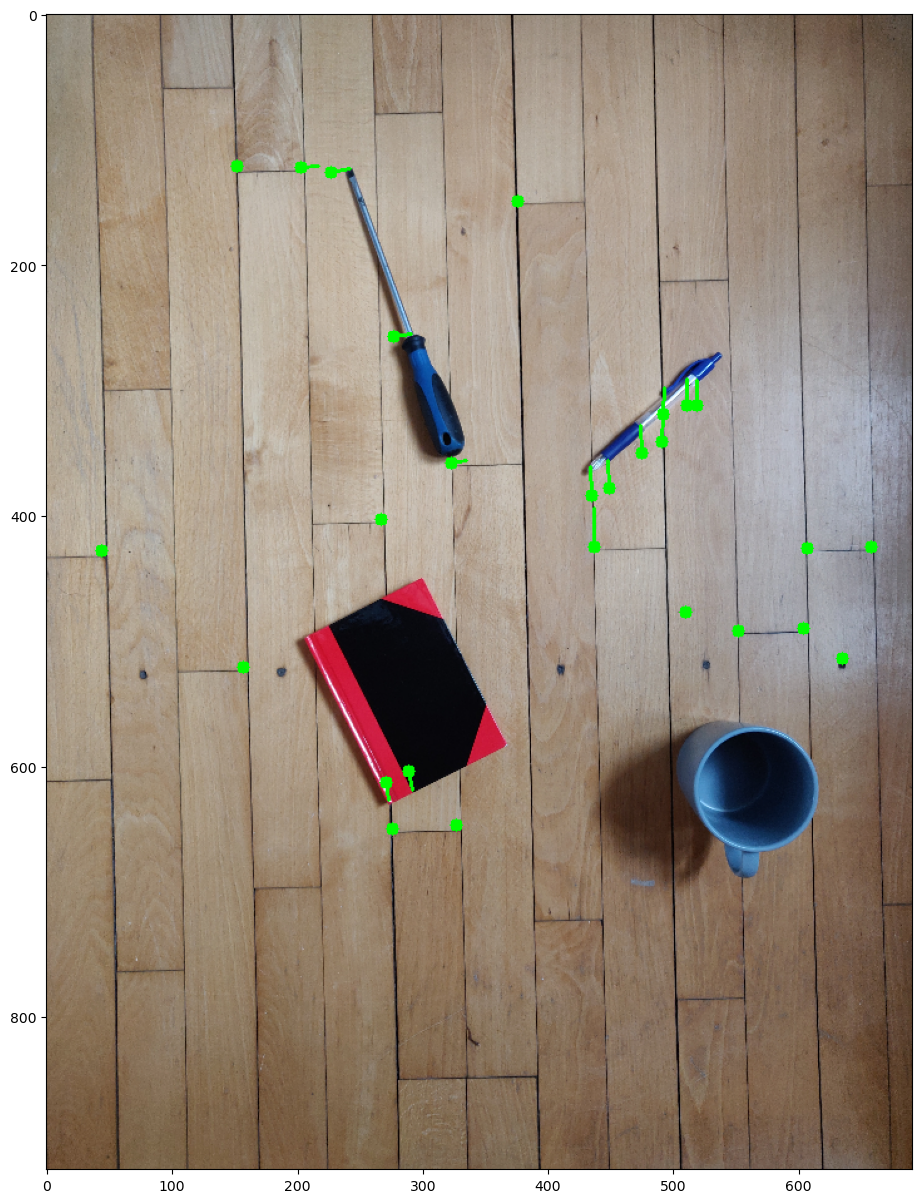

In [9]:
for i in range(len(feat1)):
    f10=int(feat1[i][0][0])
    f11=int(feat1[i][0][1])
    f20=int(feat2[i][0][0])
    f21=int(feat2[i][0][1])
    cv2.line(img2, (f10,f11), (f20, f21), (0, 255, 0), 2)
    cv2.circle(img2, (f10, f11), 5, (0, 255, 0), -1)

plt.figure(figsize=(15,15))
plt.imshow(img2)

counter = []
for i in range(len(feat1)):
    f10=(feat1[i][0][0])
    f20=(feat2[i][0][0])
    distx = np.abs(f20-f10)
    counter.append(distx)

print(counter)
print(np.max(counter))